In [1]:
import socket

In [2]:
socket.gethostname()

'char'

In [3]:
import pandas as pd
import netCDF4 as nc
import datetime as dt
import subprocess
import requests
import matplotlib.pyplot as plt
import cmocean
import numpy as np
import os
import re
import dateutil as dutil
from salishsea_tools import viz_tools, places, geo_tools, evaltools as et
import glob
import pickle
import matplotlib.dates as mdates
import matplotlib as mpl
import pytz
mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=16) 
mpl.rc('legend', fontsize=16) 
mpl.rc('axes', titlesize=16) 
mpl.rc('figure', titlesize=16) 
mpl.rc('axes', labelsize=16) 
mpl.rc('font', size=16) 

mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.numpoints'] = 1
%matplotlib inline

In [4]:
flist=['search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv',
       'search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170815T213738Z_20170825T225506Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170825T225507Z_20170923T032427Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170923T032428Z_20171016T213134Z-clean.csv',
       'search7672208/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20171016T213135Z_20180108T160335Z-clean.csv']
slist=[78,78,78,78,67,67,67,67,67,67,67,67,60,60,60]
dfs=list()
for ii in range(0,len(flist)):
    print(flist[ii])
    dfs.append(pd.read_csv('/ocean/eolson/MEOPAR/obs/ONC/turbidity/nearSurface/'+flist[ii],
        skiprows=slist[ii],header=None,usecols=[0,1,2,3,4,5,6,7,8,9,10],
        names=('TimeUTC','CDOM','CDOMQC','Chlorophyll_ug','ChlQC','Turbidity_NTU','TurbQC','Lat','LatQC','Lon','LongQC'),na_values=' NaN'))

df=pd.concat(dfs,ignore_index=True)
df.drop(df[df.ChlQC != 1].index, inplace=True)
df.reset_index(inplace=True)
dts=[dt.datetime(int(r[0:4]),int(r[5:7]),int(r[8:10]),int(r[11:13]),int(r[14:16]),int(r[17:19])) for r in df['TimeUTC']]
df=df.assign(dtUTC=dts)
df['Lat']=pd.to_numeric(df['Lat'],errors='coerce')
df['Lon']=pd.to_numeric(df['Lon'],errors='coerce')
df['Chlorophyll_ug']=pd.to_numeric(df['Chlorophyll_ug'],errors='coerce')
print('totlen=',len(df))

search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170217T003041Z_20170315T031911Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170315T031912Z_20170404T195130Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170404T195131Z_20170426T173215Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170426T173216Z_20170522T011843Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170522T011844Z_20170611T234016Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170611T234017Z_20170702T172228Z-clean.csv
search4979680/BritishColumbiaFerries_Tsawwassen-DukePoint_Turbidity-ChlorophyllandFluorescence_20170722T182607Z_20170815T213737Z-clean.csv
search4979680/BritishColumb

/data/eolson/results/MEOPAR/tools/SalishSeaTools/salishsea_tools/viz_tools.py:123: UserWarning: No contour levels were found within the data range.
  contour_lines = axes.contour(


newlen= 8646658


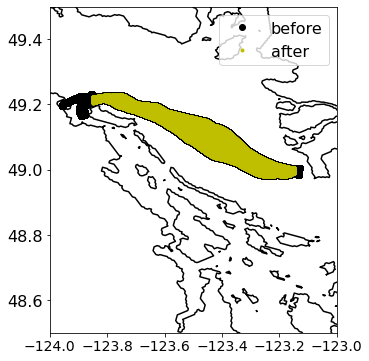

In [5]:
# chop off ends:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df['Lon'],df['Lat'], 'ko',label='before')
df.drop(df.loc[(df.Lon<-123.85)|(df.Lon>-123.15)].index,inplace=True)
ax.plot(df['Lon'],df['Lat'],'y.',label='after')
#ax.plot(df2.loc[60,['Lon']],df2.loc[60,['Lat']],'m.')
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48.5, 49.5)
ax.legend()
ax.set_xlim(-124., -123);

print('newlen=',len(df))

In [6]:
df.tail()

,index,TimeUTC,CDOM,CDOMQC,Chlorophyll_ug,ChlQC,Turbidity_NTU,TurbQC,Lat,LatQC,Lon,LongQC,dtUTC
10311578,10508563,2018-01-08T16:03:31.403Z,8.004,1,0.5978,1,19.240,1,49.217035,8,-123.806775,8,2018-01-08 16:03:31
10311579,10508564,2018-01-08T16:03:32.475Z,8.280,1,0.5856,1,19.906,1,49.217035,8,-123.806633,8,2018-01-08 16:03:32
10311580,10508565,2018-01-08T16:03:33.549Z,8.464,1,0.6222,1,19.462,1,49.217034,8,-123.806492,8,2018-01-08 16:03:33
10311581,10508566,2018-01-08T16:03:34.622Z,8.372,1,0.6100,1,20.202,1,49.217033,8,-123.806350,8,2018-01-08 16:03:34
10311582,10508567,2018-01-08T16:03:35.694Z,8.096,1,0.5734,1,20.276,1,49.217032,8,-123.806209,8,2018-01-08 16:03:35


In [7]:
def _adelta(x):
    return x.max() - x.min()

_adelta.__name__='delta'

def _crename(xx,cdict):
    return [cdict[x] if x in cdict.keys() else x for x in xx ]

def subsampleFerry(df0,interval,window,nmin,targetVar):
    df0['ts']=(df0['dtUTC']-dt.datetime(1900,1,1)).dt.total_seconds()
    df0.drop(df0[df0.ts%interval+window/2 > window].index, inplace=True)
    df0['tind']=[dt.datetime(1900,1,1)+dt.timedelta(seconds=np.round(aa/interval)*interval) for aa in df0['ts']]
    agg={targetVar:['mean','std','count'],
         'Lat':['mean',_adelta],
         'Lon':['mean',_adelta]}
    df2=df0.groupby(['tind'],as_index=False).agg(agg)
    ndict={'tind':'dtUTC','Chlorophyll_ug_mean':'Chl','Lat_mean':'Lat','Lon_mean':'Lon'}
    df2.columns = _crename(['_'.join(tup).rstrip('_') for tup in df2.columns.values],ndict)
    df2.drop(df2[df2.Chlorophyll_ug_count<nmin].index, inplace=True)
    df2.reset_index(inplace=True)
    return df2

In [8]:
interval=10*60
window=60
nmin=3
targetVar='Chlorophyll_ug'
t0=dt.datetime.now()
df2=subsampleFerry(df,interval,window,nmin,targetVar)
print((dt.datetime.now()-t0))
len(df2)

0:00:06.548934


15629

Text(0.5, 1.0, 'subsampled')

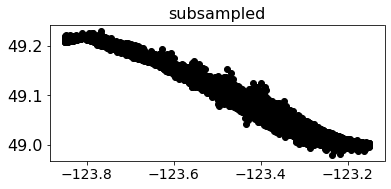

In [9]:
fig, ax = plt.subplots(figsize = (6,6))
viz_tools.set_aspect(ax, coords = 'map')
#ax.plot(df['Lon'],df['Lat'], 'ro',label='data')
ax.plot(df2['Lon'],df2['Lat'], 'ko')
ax.set_title('subsampled')

Text(0.5, 0, 'Hour')

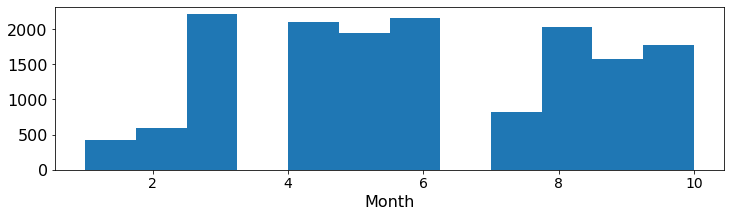

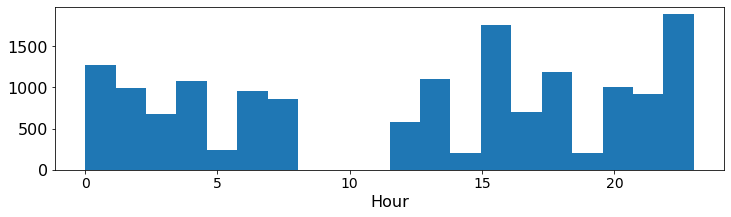

In [20]:
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.month for xx in df2['dtUTC']],12)
ax.set_xlabel('Month')
fig,ax=plt.subplots(figsize=(12,3))
ax.hist([xx.hour for xx in df2['dtUTC']],20)
ax.set_xlabel('Hour')

In [11]:
df2.tail()

,index,dtUTC,Chl,Chlorophyll_ug_std,Chlorophyll_ug_count,Lat,Lat_delta,Lon,Lon_delta
15624,15638,2018-01-08 14:20:00,0.848952,0.038097,29,49.151370,0.001237,-123.579595,0.003648
15625,15639,2018-01-08 14:30:00,0.652910,0.028541,29,49.175919,0.001203,-123.651933,0.003618
15626,15640,2018-01-08 14:40:00,0.493664,0.014656,28,49.197837,0.000996,-123.725133,0.003584
15627,15641,2018-01-08 14:50:00,0.575503,0.028809,29,49.217438,0.000325,-123.800037,0.004062
15628,15642,2018-01-08 16:00:00,0.554469,0.024743,29,49.213155,0.000755,-123.832206,0.003847


In [14]:
PATH= '/results/SalishSea/nowcast-green.201812/'
start_date = dt.datetime(2015,1,1)
end_date = dt.datetime(2018,1,1) #end of current ONC file is <2017 7 3
flen=1
namfmt='nowcast'
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}
fdict={'ptrc_T':1,'grid_T':1}

### Note: this call to matchData takes advantage of restricted search option that looks for the next point near the previous point, which is much faster for ferry data
- model output returned is average of upper 3 levels

In [15]:
it0=dt.datetime.now()
print(it0)
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen,wrapSearch=True,wrapTol=12,method='ferry')
print(dt.datetime.now()-it0)

2021-02-04 14:57:43.281776
ferry
data is matched to mean of upper 3 model levels
done index ptrc_T 2021-02-04 14:58:03.502509
ptrc_T progress: 0.0%
ptrc_T progress: 10.00065750542442%
ptrc_T progress: 20.00131501084884%
ptrc_T progress: 30.001972516273263%
ptrc_T progress: 40.00263002169768%
ptrc_T progress: 50.0032875271221%
ptrc_T progress: 60.003945032546525%
ptrc_T progress: 70.00460253797094%
ptrc_T progress: 80.00526004339535%
ptrc_T progress: 90.00591754881978%
0:38:04.146703


In [17]:
mod_chl_N=2.0
mod_chl_N=1.6
data['modChl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])
data['l10_obsChl']=np.log10(data['Chl']+0.01)
data['l10_modChl']=np.log10(data['modChl']+0.01)

Text(0, 0.5, 'Chl ug/l')

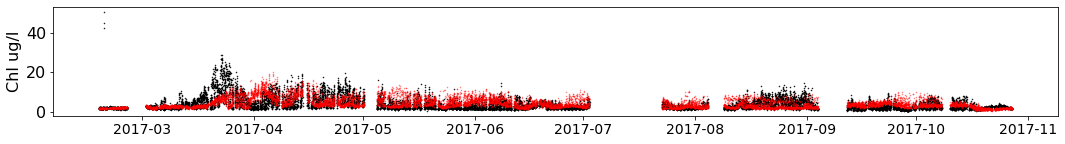

In [21]:
fig,ax=plt.subplots(figsize=(18,2))
ax.plot(data['dtUTC'],data['Chl'],'k.',ms=1)
ax.plot(data['dtUTC'],data['modChl'],'r.',ms=1,alpha=.5)
ax.set_ylabel('Chl ug/l')

Text(0.5, 1.0, 'log Chlorophyll Comparison')

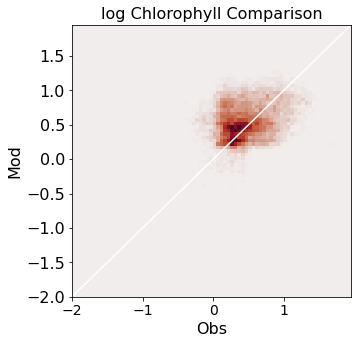

In [22]:
fig,ax=plt.subplots(figsize=(5,5))
ax.hist2d(data['l10_obsChl'],data['l10_modChl'],np.arange(-2,2.0,.05),cmap=cmocean.cm.amp);
ax.set_xlabel('Obs')
ax.set_ylabel('Mod')
ax.plot((-2,2),(-2,2),'w-')
ax.set_title('log Chlorophyll Comparison')

In [23]:
def _rmse(delf):
    return np.sqrt(np.mean(np.power(delf,2)))
_rmse.__name__='RMSE'

In [24]:
data['ER']=data['l10_modChl']-data['l10_obsChl']
agg={'ER':[_rmse,'mean'],
     'Chl':'count'}
df3=data.groupby(['i','j'],as_index=False).agg(agg)
df3.columns = ['_'.join(tup).rstrip('_') for tup in df3.columns.values]
df3=df3.reindex()

In [25]:
df3

,i,j,ER_RMSE,ER_mean,Chl_count
0,225,486,0.314045,-0.142812,7
1,225,487,0.302456,0.003893,26
2,226,486,0.257687,-0.035058,37
3,226,487,0.280548,-0.001598,126
4,226,488,0.308059,-0.056105,3
...,...,...,...,...,...
990,301,396,0.406096,0.294756,20
991,301,397,0.431437,0.276405,148
992,301,398,0.355900,0.184012,39
993,302,396,0.377587,0.239864,22


In [27]:
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    tmask=mesh.variables['tmask'][:,:,:,:]

Text(0.5, 1.0, 'bias log10 Chl')

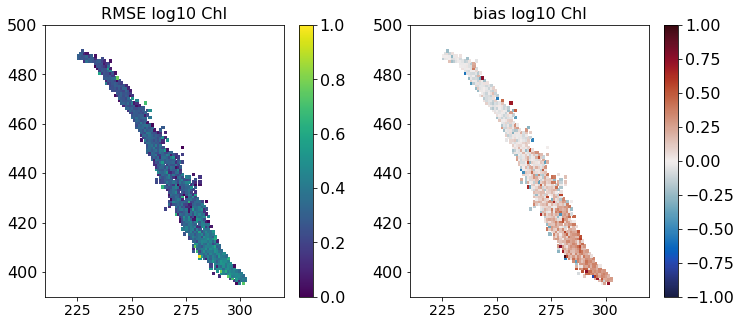

In [28]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
    blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=1.)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-1,vmax=1,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl')

Text(0.5, 1.0, 'Bias log10[Chl ($\\mu$g L$^{-1}$)]')

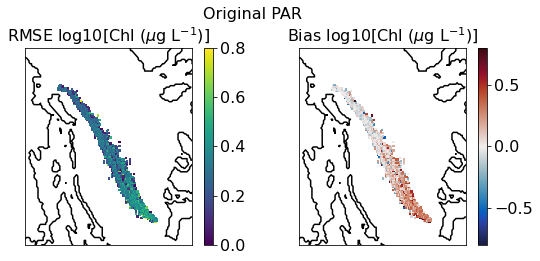

In [30]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
    blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(9,5*3/4))
fig.subplots_adjust(wspace=.2,bottom=.1,top=.83)
iax=ax[0]
viz_tools.set_aspect(iax)
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(iax, grid, coords = 'grid')
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=.8)
iax.set_xlim(200,330)
iax.set_ylim(380,515)
iax.set_yticks(());
iax.set_xticks(());
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10[Chl ($\mu$g L$^{-1}$)]')
iax=ax[1]
viz_tools.set_aspect(iax)
with nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc') as grid:
    viz_tools.plot_coastline(iax, grid, coords = 'grid')
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=.8)
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-.8,vmax=.8,cmap=cmocean.cm.balance)
iax.set_xlim(200,330)
iax.set_ylim(380,515)
iax.set_yticks(());
iax.set_xticks(());
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
fig.suptitle('Original PAR')
iax.set_title('Bias log10[Chl ($\mu$g L$^{-1}$)]')
#fig.savefig('/home/eolson/pyCode/notebooks/figs/ferryChlBiasOldPAR.png',dpi=200,transparent=True)

Text(0.5, 1.0, 'bias log10 Chl, n>2')

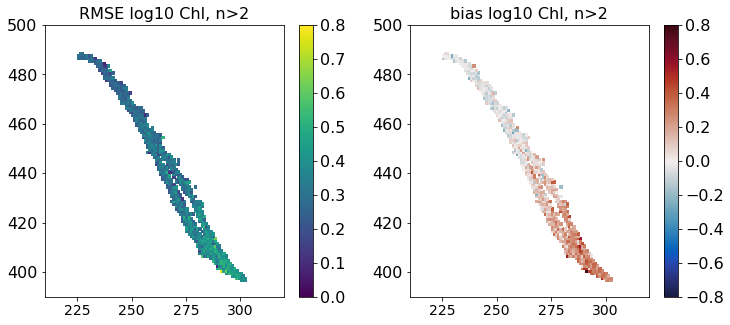

In [31]:
blank=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
blank2=np.nan*np.ones(np.shape(tmask[0,0,:,:]))
for ind, r in df3.iterrows():
    if r['Chl_count']>=3:
        blank[int(r['j']),int(r['i'])]=r['ER_RMSE']
        blank2[int(r['j']),int(r['i'])]=r['ER_mean']
fig,ax=plt.subplots(1,2,figsize=(12,5))
iax=ax[0]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank),vmin=0,vmax=.8)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('RMSE log10 Chl, n>2')
iax=ax[1]
m=iax.pcolormesh(np.ma.masked_where(np.isnan(blank),blank2),vmin=-.8,vmax=.8,cmap=cmocean.cm.balance)
iax.set_xlim(210,320)
iax.set_ylim(390,500)
viz_tools.set_aspect(iax);
fig.colorbar(m,ax=iax)
iax.set_title('bias log10 Chl, n>2')